# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
#Importing relevant libraries

import torch
import numpy as np
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


In [3]:
### TODO: Write data loaders for training, validation, and test sets

## Specify appropriate transforms, and batch_sizes
batch_size = 50
valid_size = 0.15
transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.RandomHorizontalFlip(p=0.3),
                                transforms.RandomRotation((0,360)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.406, 0.406),(0.229, 0.224, 0.225))])
train_data = datasets.ImageFolder('/data/landmark_images/train',transform=transform)
test_data = datasets.ImageFolder('/data/landmark_images/test',transform=transform)
#Choose data to be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size *num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                           sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                          sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size)
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 


- I resized the image by stretching the images such that they all have a uniform size of 128x128. I chose 128 since 256x256 is a common image size. However, I was trying to reduce the computation time in the training process. As a result, I decided to use 128x128 where it's dimensions are half of 256. 

- Yes. I decided to augment the data set through random horizontal flips and random rotations. This way, images that are oriented differently will still be detected to be the correct location. 

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

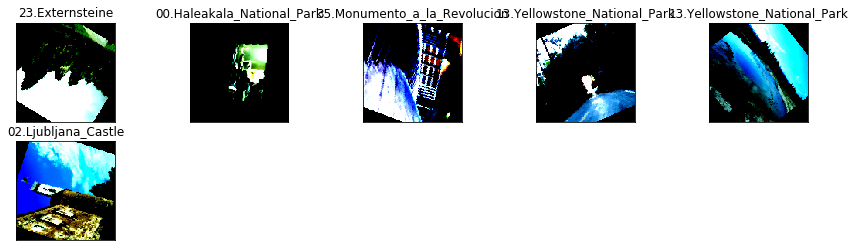

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

#Obtain one batch of training images 
dataiter = iter(train_loader)   
images, labels = dataiter.next()
images = images.numpy() #Convert images to numpy from Tensor 
#Plot images 
fig = plt.figure(figsize=(15, 4))
#Display 6 images 
for i in np.arange(6):
    axis = fig.add_subplot(2,10/2,i+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(images[i],(1,2,0)).clip(0,1))
    axis.set_title(train_loader.dataset.classes[labels[i]])

### Initialize use_cuda variable

In [5]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [6]:
import torch.optim as optim
import torch.nn as nn
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
#Cross entropy loss+SGD
def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    return optim.SGD(model.parameters(), lr=0.05)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [7]:
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN- 3 layers
        self.conv1 = nn.Conv2d(3,32,8,padding=3,stride=2)
        self.conv2 = nn.Conv2d(32,64,8,padding=3,stride=2)
        self.conv3 = nn.Conv2d(64,128,8,padding=3,stride=2)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(2*2*128,128)
        self.fc2 = nn.Linear(128,50)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,2*2*128)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
 
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  In my init function, I defined 3 convolutional layers, pooling layers, 2 fully connected layers and dropout so that they could be used later in my forward function. Within the forward function, first, the convolutional layers are applied with a relu function. The Max Pooling is applied after applying each convolutional layer so that the x-y dimensions could be reduced while the depth increases. Afterwards, the vector is flattened so that it can be passed through the fully connected layers with a relu function. At the last layer no relu function is applied and x is returned. 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [8]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

            optimizer.zero_grad()
            output = model_scratch(data)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss +=((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model_scratch(data)
            loss = criterion(output,target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min: 
            print('Validation loss decreased')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [9]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    
    #Applies normal distribution initialization strategy to weight initialization
    classname = m.__class__.__name__
    if classname.find('Linear') != -1: #If linear layer
        n = m.in_features
        m.weight.data.normal_(0.0,1.0/np.sqrt(n)) #fill weights with random normal distribution
        m.bias.data.fill_(0) #fill bias with 0

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.903475 	Validation Loss: 3.861938
Validation loss decreased
Epoch: 2 	Training Loss: 3.857204 	Validation Loss: 3.775579
Validation loss decreased
Epoch: 3 	Training Loss: 3.807463 	Validation Loss: 3.697176
Validation loss decreased
Epoch: 4 	Training Loss: 3.763061 	Validation Loss: 3.661943
Validation loss decreased
Epoch: 5 	Training Loss: 3.745209 	Validation Loss: 3.636969
Validation loss decreased
Epoch: 6 	Training Loss: 3.695180 	Validation Loss: 3.594514
Validation loss decreased
Epoch: 7 	Training Loss: 3.648567 	Validation Loss: 3.533888
Validation loss decreased
Epoch: 8 	Training Loss: 3.617314 	Validation Loss: 3.663969
Epoch: 9 	Training Loss: 3.568566 	Validation Loss: 3.620996
Epoch: 10 	Training Loss: 3.527804 	Validation Loss: 3.395142
Validation loss decreased
Epoch: 11 	Training Loss: 3.499845 	Validation Loss: 3.391244
Validation loss decreased
Epoch: 12 	Training Loss: 3.482171 	Validation Loss: 3.380720
Validation loss decreased
Epoch

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [13]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 25

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.909399 	Validation Loss: 3.887891
Validation loss decreased
Epoch: 2 	Training Loss: 3.855375 	Validation Loss: 3.800049
Validation loss decreased
Epoch: 3 	Training Loss: 3.802710 	Validation Loss: 3.780782
Validation loss decreased
Epoch: 4 	Training Loss: 3.757511 	Validation Loss: 3.746829
Validation loss decreased
Epoch: 5 	Training Loss: 3.718534 	Validation Loss: 3.702884
Validation loss decreased
Epoch: 6 	Training Loss: 3.672474 	Validation Loss: 3.733378
Epoch: 7 	Training Loss: 3.630565 	Validation Loss: 3.619883
Validation loss decreased
Epoch: 8 	Training Loss: 3.599647 	Validation Loss: 3.631356
Epoch: 9 	Training Loss: 3.564998 	Validation Loss: 3.585099
Validation loss decreased
Epoch: 10 	Training Loss: 3.551260 	Validation Loss: 3.575338
Validation loss decreased
Epoch: 11 	Training Loss: 3.513850 	Validation Loss: 3.519432
Validation loss decreased
Epoch: 12 	Training Loss: 3.486314 	Validation Loss: 3.500519
Validation loss decreased
Epoch

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.141072


Test Accuracy: 21% (274/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [11]:
import torch
import numpy as np
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [12]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 50
valid_size = 0.15
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(p=0.3),
                                transforms.RandomRotation((0,360)),                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.406, 0.406),(0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder('/data/landmark_images/train',transform=transform)
test_data = datasets.ImageFolder('/data/landmark_images/test',transform=transform)
#Choose data to be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size *num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                           sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                          sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [13]:
import torch.optim as optim
import torch.nn as nn

## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    return optim.SGD(model.classifier.parameters(),lr=0.01)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [14]:
## TODO: Specify model architecture

model_transfer = models.vgg16(pretrained=True)

for param in model_transfer.features.parameters(): #To avoid overfitting
    param.requires_grad = False

#Replace the last layer of the vgg network for the task in hand 
in_features = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = torch.nn.Linear(in_features,50)
#-#-# Do NOT modify the code below this line. #-#-#
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 114510353.04it/s]


__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I chose this architecture instead of fine-tuning since we are working with similar data(all geographical locations) and a smaller dataset(a few thousand images). As a result, I chose to use transfer learning by replacing the last layer in the ConvNet so that the input and output features were suitable for this project. 

Above, I first imported the vgg16 model since that is a common model for image identification. I then freezed the parameters to avoid overfitting since we were working with a smaller data set. Then I replaced the last layer (6th layer) with a new linear layer that has the same input features but now, has 50 output features or classes. As a result, my final CNN architecture suits this project and may now be trained. 


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [17]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
n_epochs=10
valid_loss_min = np.Inf
optimizer = get_optimizer_transfer(model_transfer)

for e in range(n_epochs): 
    train_loss = 0.0
    valid_loss = 0.0
    
    model_transfer.train()
    for batch_i, (data,target) in enumerate(loaders_transfer['train']): 
        if use_cuda:
            data,target = data.cuda(), target.cuda()
        
        optimizer.zero_grad()
        output = model_transfer(data)
        loss = criterion_transfer(output, target)
        loss.backward()
        optimizer.step()
        train_loss +=((1 / (batch_i + 1)) * (loss.data.item() - train_loss))

    model_transfer.eval()
    for batch_i, (data,target) in enumerate(loaders_transfer['valid']):
        if use_cuda:
            data,target = data.cuda(), target.cuda()
        
        output = model_transfer(data)
        loss = criterion_transfer(output, target)
        valid_loss += ((1 / (batch_i + 1)) * (loss.data.item() - valid_loss))
 # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e, 
        train_loss,
        valid_loss
        ))

    ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
    if valid_loss <= valid_loss_min: 
        print('Validation loss decreased')
        torch.save(model_transfer.state_dict(), 'model_transfer.pt')
        valid_loss_min = valid_loss

#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 0 	Training Loss: 1.519683 	Validation Loss: 1.631139
Validation loss decreased
Epoch: 1 	Training Loss: 1.481593 	Validation Loss: 1.671440
Epoch: 2 	Training Loss: 1.432936 	Validation Loss: 1.588596
Validation loss decreased
Epoch: 3 	Training Loss: 1.356605 	Validation Loss: 1.609891
Epoch: 4 	Training Loss: 1.316227 	Validation Loss: 1.539631
Validation loss decreased
Epoch: 5 	Training Loss: 1.266993 	Validation Loss: 1.592640


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.385754


Test Accuracy: 63% (789/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [17]:
def slice (string):
    return string[3:]
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
class_names = list(train_loader.dataset.classes)
class_names = [slice(c) for c in class_names]
class_names = [c.replace("_"," ") for c in class_names]
def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    transform = transforms.Compose([transforms.Resize((254,254)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485, 0.406, 0.406),(0.229, 0.224, 0.225))])
    
    #Read image using image path
    img = Image.open(img_path)
    #Preprocess loaded image using Pytorch transforms
    img = transform(img)
    #Feed in the image to the trained model and get the tensors as output.
    img.unsqueeze_(0)
    if use_cuda:
        img = img.cuda()
    
    model_transfer.eval()
    prediction = model_transfer(img)
    #index = prediction.data.cpu().numpy().argmax() #index of the max value (predicted)
    value, index = torch.topk(prediction, k)    
    places=[]
    for i in range(k):
        places.append(class_names[index[0][i]])
    return places
    #Now, you can use PyTorch's topk function to get top k probabilities. 
    #It will also return the index that can be used to get the class name.
    
    
# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Niagara Falls',
 'Vienna City Hall',
 'Golden Gate Bridge',
 'Temple of Heaven',
 'Banff National Park']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

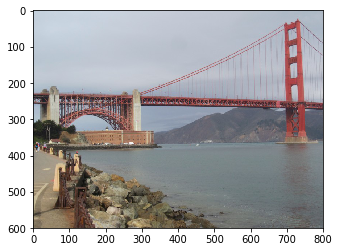

Is this picture of the Niagara Falls,Vienna City Hall, or Golden Gate Bridge?


In [18]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    print('Is this picture of the {},{}, or {}?'.format(predicted_landmarks[0],predicted_landmarks[1],predicted_landmarks[2]))
# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output is worse than I expected. Points of improvement are described below: 

- Execute more epochs. As I was trying to save on training time, I went below the suggested number of epochs for training which may have affected the amount of final loss. 

- Increase the number of convolutional or fully connected layers. This way, the algorithm is able to find more patterns within each image making it more likely to detect errors. 

- Try out different models for transfer learning. There may be a different model other than vgg16 that performs better with this task

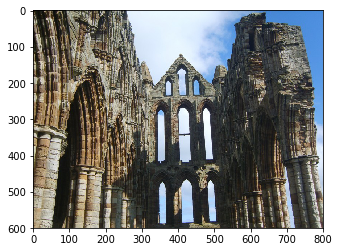

Is this picture of the Banff National Park,Niagara Falls, or Great Wall of China?


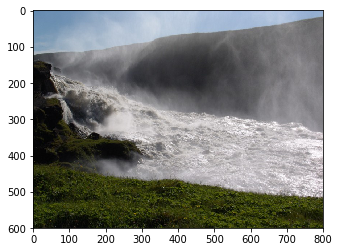

Is this picture of the Changdeokgung,Forth Bridge, or Monumento a la Revolucion?


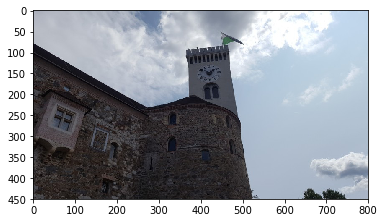

Is this picture of the Ljubljana Castle,Seattle Japanese Garden, or Hanging Temple?


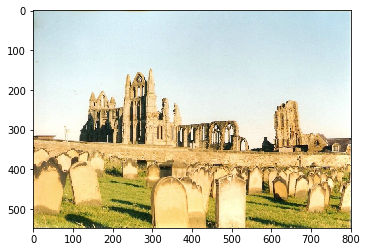

Is this picture of the Niagara Falls,Edinburgh Castle, or Banff National Park?


In [19]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
import os

for file in os.listdir('./test/'):
    if file.endswith('.jpg'):
        suggest_locations('./test/' + file)